<a href="https://colab.research.google.com/github/tnqkrghd/NLP/blob/main/04_%EC%B9%B4%EC%9A%B4%ED%8A%B8_%EA%B8%B0%EB%B0%98%EC%9D%98_%EB%8B%A8%EC%96%B4_%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **4. 카운트 기반의 단어 표현**

### **4.1 다양한 단어의 표현 방법**

* 단어의 표현 방법은 크게 국소 표현(Local Representation)과 분산 표현(Distributed Representation) 방법으로 나뉜다.

* 전자는 해당 단어 그 자체만 보고 특정값을 맵핑하여 단어를 표현하며,

  후자는 그 단어를 표현하고자 주변을 참고하여 단어를 표현한다.

* 비슷한 의미로 국소 표현을 이산 표현(Discrete Representation)이라고도 하며, 

  분산 표현을 연속 표현(Continuous Represnetation)이라고도 한다.

  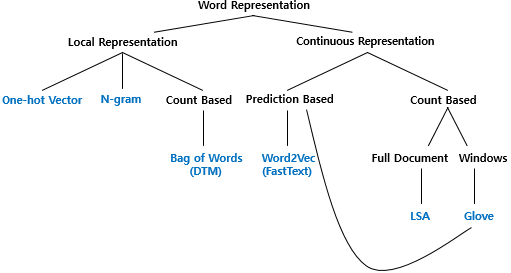

### **4.2 Bag of Words(BoW)**

* Bag of Words란 단어들의 순서는 전혀 고려하지 않고, 단어들의 **출현 빈도(frequency)에만 집중**하는 텍스트 데이터의 수치화 표현 방법

* (1) 각 단어에 고유한 정수 인덱스를 부여

  (2) 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 생성

In [ ]:
pip install konlpy

In [12]:
from konlpy.tag import Okt
import re

okt = Okt()

token = re.sub("(\.)", "", "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")
# 온점 제거

token = okt.morphs(token)
# 형태소 분석기를 통해 토큰화 작업 수행

word2index = {}
bow = []
for voca in token:
  if voca not in word2index.keys():
    word2index[voca] = len(word2index)
    bow.insert(len(word2index)-1, 1)
  else:
    index = word2index.get(voca)
    bow[index] += 1

In [13]:
print(word2index)
print(bow)

{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


* BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이기 때문에, 
  
  주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰인다.
  - ex) 분류 문제, 여러 문서 간의 유사도를 구하는 문제 

In [19]:
# CountVectorizer 클래스로 BoW 만들기

from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)
# CountVectorizer 는 길이가 2 이상인 문자만 토큰으로 인식하기에 'I' 가 제거된 모습

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


* CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는

  낮은 수준의 토큰화를 진행하고 BoW를 만들기에 한국어에선 잘 작동하지 않는다.

In [24]:
# 불용어를 제거한 Bow 만들기
# (1) 직접 정의한 불용어 사용

from sklearn.feature_extraction.text import CountVectorizer

text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])

print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [26]:
# (2) CountVectorizer 에서 제공하는 자체 불용어 사용

text=["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")

print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


In [ ]:
import nltk
nltk.download('stopwords')

In [32]:
# (3) NLTK 에서 지원하는 불용어 사용
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text=["Family is not an important thing. It's everything."]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words=sw)

print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}
